# Họ và Tên: Đỗ Minh Quân
# MSSV: 207CT10276

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


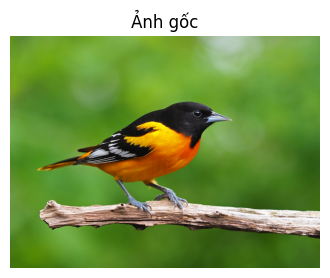

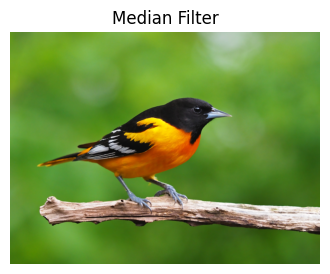

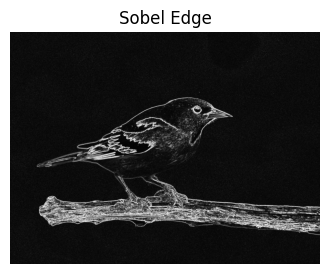

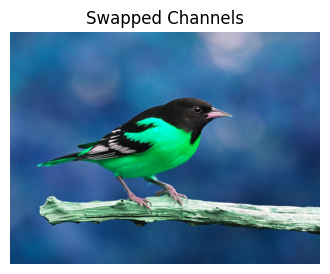

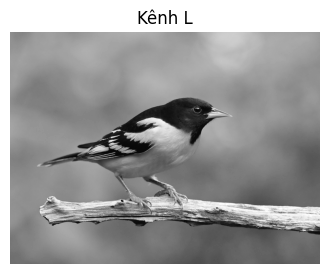

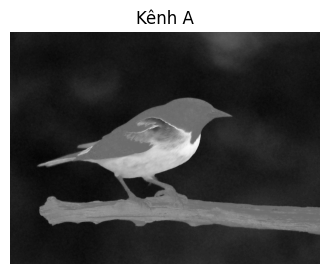

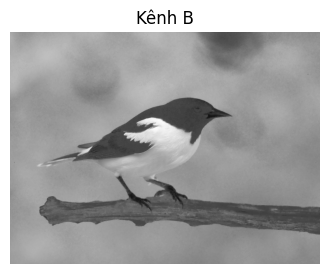

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title='', cmap=None):
    plt.figure(figsize=(4,4))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Đọc ảnh gốc
img = cv2.imread('my_image.jpg')
show_image(img, 'Ảnh gốc')

# 1. Median filter làm mịn ảnh
median = cv2.medianBlur(img, 5)
cv2.imwrite('my_image_median.jpg', median)
show_image(median, 'Median Filter')

# 2. Sobel filter xác định biên
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))
cv2.imwrite('my_image_sobel.jpg', sobel)
show_image(sobel, 'Sobel Edge', cmap='gray')

# 3. Hoán đổi thứ tự các kênh màu (ví dụ: BGR -> GRB)
swapped = img[:, :, [1, 2, 0]]  # BGR -> GRB
cv2.imwrite('my_image_swapped.jpg', swapped)
show_image(swapped, 'Swapped Channels')

# 4. Chuyển sang LAB và tách 3 kênh
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(lab)
cv2.imwrite('my_image_L.jpg', L)
cv2.imwrite('my_image_A.jpg', A)
cv2.imwrite('my_image_B.jpg', B)
show_image(L, 'Kênh L', cmap='gray')
show_image(A, 'Kênh A', cmap='gray')
show_image(B, 'Kênh B', cmap='gray')

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


Menu:
B: Gaussian Blur
M: Median Blur
F: Bilateral Filter
E: Canny Edge
R: Erosion
D: Dilation
Đã lưu: result_gaussian_fruit.jpg


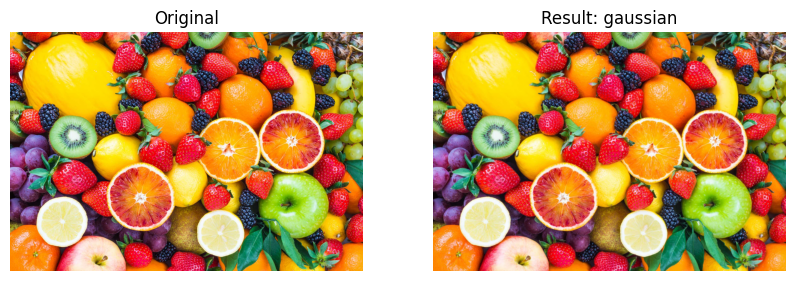

Đã lưu: result_gaussian_world_cup.jpg


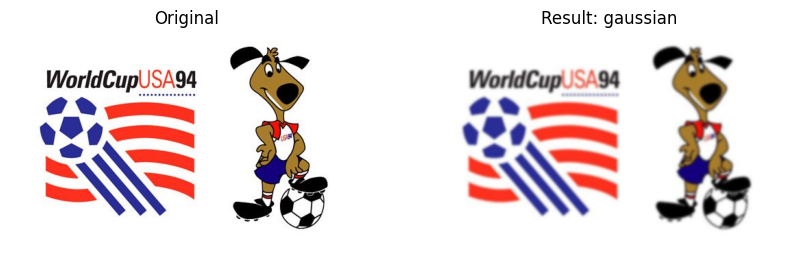

Đã lưu: result_gaussian_my_image.jpg


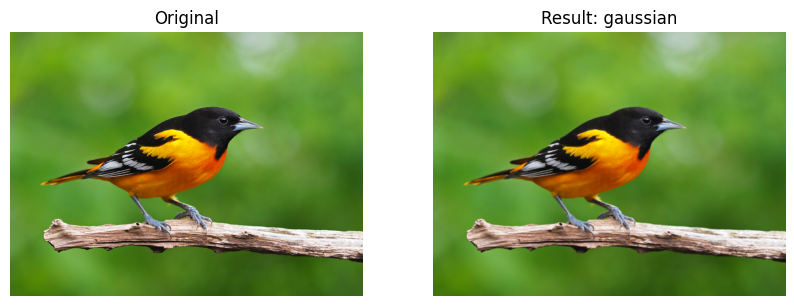

In [1]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

# ---- Danh sách 3 ảnh ----
images = [
    "fruit.jpg",      # Thay bằng tên ảnh của bạn
    "world_cup.jpg",
    "my_image.jpg"
]

# Đọc ảnh
loaded_images = []
for path in images:
    img = cv2.imread(path)
    if img is None:
        print(f"Không tìm thấy ảnh: {path}")
        exit()
    loaded_images.append(img)

# ---- Các hàm xử lý ----
def gaussian_blur(img):
    ksize = random.choice(range(3, 12, 2))
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def median_blur(img):
    ksize = random.choice(range(3, 12, 2))
    return cv2.medianBlur(img, ksize)

def bilateral_filter(img):
    d = random.randint(5, 15)
    sigmaColor = random.randint(50, 150)
    sigmaSpace = random.randint(50, 150)
    return cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)

def canny_edge(img):
    threshold1 = random.randint(50, 100)
    threshold2 = random.randint(100, 150)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, threshold1, threshold2)

def erosion(img):
    ksize = random.randint(2, 5)
    kernel = np.ones((ksize, ksize), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def dilation(img):
    ksize = random.randint(2, 5)
    kernel = np.ones((ksize, ksize), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

# Map phím chức năng với hàm xử lý
methods = {
    'B': ('gaussian', gaussian_blur),
    'M': ('median', median_blur),
    'F': ('bilateral', bilateral_filter),
    'E': ('canny', canny_edge),
    'R': ('erosion', erosion),
    'D': ('dilation', dilation)
}

# ---- Menu chọn ----
print("Menu:")
print("B: Gaussian Blur")
print("M: Median Blur")
print("F: Bilateral Filter")
print("E: Canny Edge")
print("R: Erosion")
print("D: Dilation")

# Lặp đến khi nhập đúng
while True:
    key = input("Nhập phím tương ứng phương pháp: ").upper()
    if key in methods:
        break
    else:
        print("Phím không hợp lệ! Vui lòng nhập lại.")

# Lấy hàm xử lý được chọn
method_name, func = methods[key]

# Xử lý từng ảnh
for path, img in zip(images, loaded_images):
    result = func(img)
    basename = os.path.splitext(os.path.basename(path))[0]
    out_name = f"result_{method_name}_{basename}.jpg"
    cv2.imwrite(out_name, result)
    print(f"Đã lưu: {out_name}")

    # Hiển thị ảnh gốc và kết quả
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    if method_name == 'canny':
        plt.imshow(result, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f'Result: {method_name}')
    plt.axis('off')

    plt.show()

### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [ ]:
# Cell 1: Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Tạo thư mục lưu kết quả
os.makedirs("output", exist_ok=True)

# Cell 2: Đọc ảnh (gắn cứng đường dẫn)
img1 = cv2.imread("fruit.jpg")
img2 = cv2.imread("world_cup.jpg")
img3 = cv2.imread("my_image.jpg")

# Kiểm tra ảnh
if img1 is None or img2 is None or img3 is None:
    raise FileNotFoundError("Không tìm thấy một trong các ảnh! Kiểm tra đường dẫn.")

# Cell 3: Ảnh 1 - Tăng kích thước 35px mỗi cạnh
img1_border = cv2.copyMakeBorder(img1, 35, 35, 35, 35, cv2.BORDER_CONSTANT, value=(0, 0, 0))
cv2.imwrite("output/img1_border.jpg", img1_border)

# Cell 4: Ảnh 2 - Xoay 135 độ và lật ngang
(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 135, 1.0)
rotated = cv2.warpAffine(img2, M, (w, h))
img2_flip = cv2.flip(rotated, 1)
cv2.imwrite("output/img2_rotated_flipped.jpg", img2_flip)

# Cell 5: Ảnh 3 - Phóng to 5 lần và làm mờ Gaussian 9x9
img3_up = cv2.resize(img3, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
img3_blur = cv2.GaussianBlur(img3_up, (9, 9), 0)

# Điều chỉnh độ sáng và độ tương phản
alpha = 1.5  # tương phản
beta = 30    # độ sáng
img3_adjusted = cv2.convertScaleAbs(img3_blur, alpha=alpha, beta=beta)
cv2.imwrite("output/img3_final.jpg", img3_adjusted)

# Cell 6: Hiển thị kết quả
def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image("Ảnh 1 - Tăng kích thước", img1_border)
show_image("Ảnh 2 - Xoay & Lật ngang", img2_flip)
show_image("Ảnh 3 - Phóng to + Blur + Điều chỉnh sáng/contrast", img3_adjusted)

[ WARN:0@54.666] global loadsave.cpp:241 findDecoder imread_('bird.png'): can't open/read file: check file path/integrity
[ WARN:0@54.667] global loadsave.cpp:241 findDecoder imread_('ca.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54.667] global loadsave.cpp:241 findDecoder imread_('cam.jpg'): can't open/read file: check file path/integrity


FileNotFoundError: Không tìm thấy một trong các ảnh! Kiểm tra đường dẫn.

# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.